In [80]:
import cv2
import numpy as np

In [81]:
from tensorflow.keras.models import model_from_json
with open('model3.json',"r") as file:
  model_json=file.read()
loaded_model=model_from_json(model_json)

### Testing real time 

In [82]:
cv2.ocl.setUseOpenCL(False)

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# start the webcam 
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    bounding_box = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    num_faces = bounding_box.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray_frame = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        emotion_prediction = loaded_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('Video', cv2.resize(frame,(1200,860),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

### Testing with external photo

(1, 50, 50, 1)
[[0.00149763 0.03874395 0.0015228  0.01466301 0.8413865  0.09476932
  0.00741684]]
4


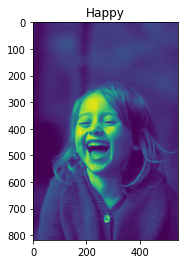

In [83]:
import  numpy as  np
import matplotlib.pyplot as plt
image_path =  "happy.jpg"

img =  cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
input_img=np.expand_dims(np.expand_dims(cv2.resize(gray, (50, 50)), -1), 0)
print(input_img.shape)
emotion_prediction=loaded_model.predict(input_img)
print(emotion_prediction)
a=int(np.argmax(emotion_prediction))
print(a)
if a==1:
    plt.title('Angry')
elif a==2:
    plt.title('Disgust')
elif a==3:
    plt.title('Fear')
elif a==4:
    plt.title('Happy')
elif a==5:
    plt.title('Neutral')
elif a==6:
    plt.title('Sad')
else:
    plt.title('Surprise')
plt.imshow(gray)
plt.show()